# CS412 Machine Learning Term Project - German Credit Data

### GC-23 / Group Members:
1. Görkem Filizöz 27814
2. Uğur Öztunç 28176

### **1) Initialize**


In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **2) Import Necessary Libraries**

In [61]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib as plt 
import matplotlib.pyplot as plt 
import seaborn as sns
import random

import os

In [62]:
# set the seeds for reproducibility
random.seed(42)
np.random.seed(42)

### **3) Analyze the Dataset**

In [63]:
data = pd.read_csv("german_credit_data.csv", index_col=0)
print("Train data dimensionality: ", data.shape)
print("Examples from train data: ")
data.sample(5)

Train data dimensionality:  (1000, 10)
Examples from train data: 


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
521,24,female,2,own,little,little,3190,18,radio/TV,bad
737,35,male,1,own,moderate,little,4380,18,car,good
740,32,male,2,own,moderate,little,2325,24,car,good
660,23,male,2,rent,little,rich,1297,12,radio/TV,good
411,35,male,3,own,little,NaN,7253,33,car,good


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


### **4) Handle missing values if any**

In [65]:
#It displays the number and rates of missing data in the dataset.
pd.concat([data.isnull().sum(), 100 * data.isnull().sum()/len(data)], 
              axis=1).rename(columns={0:'Missing Records', 1:'Percentage (%)'})  

,Missing Records,Percentage (%)
Age,0,0.0
Sex,0,0.0
Job,0,0.0
Housing,0,0.0
Saving accounts,183,18.3
Checking account,394,39.4
Credit amount,0,0.0
Duration,0,0.0
Purpose,0,0.0
Risk,0,0.0


In [66]:
#It calculates the number of occurrences for each unique value in the 'Saving accounts' and 'Checking account' variables.
#dropna = False; If there are NaN values, it means to show them.
data["Saving accounts"].value_counts(dropna = False)
data["Checking account"].value_counts(dropna = False)

#We can fill our categorical variables using the mode method.
for column in data.columns:
    data[column].fillna(data[column].mode()[0], inplace=True) 

data.head(5)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,little,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,little,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


### **5) Data Visualization**

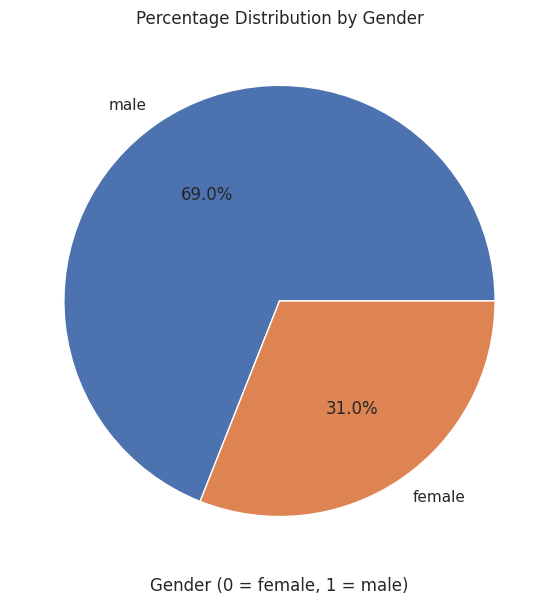

In [67]:
fig = plt.figure(figsize=(7, 7))  # Gender distribution in the dataset
data['Sex'].value_counts().plot(kind='pie', autopct='%.1f%%')
plt.xlabel("Gender (0 = female, 1 = male)")
plt.ylabel("", fontsize=20)
plt.title("Percentage Distribution by Gender")
print("")


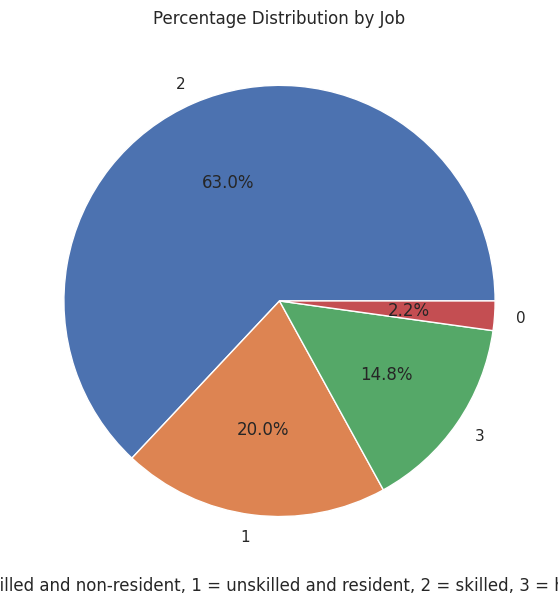

In [68]:
fig = plt.figure(figsize=(7, 7))
data['Job'].value_counts().plot(kind='pie', autopct='%.1f%%')
plt.xlabel("Job (0 = unskilled and non-resident, 1 = unskilled and resident, 2 = skilled, 3 = highly skilled)")
plt.ylabel("", fontsize=20)
plt.title("Percentage Distribution by Job")
print("")

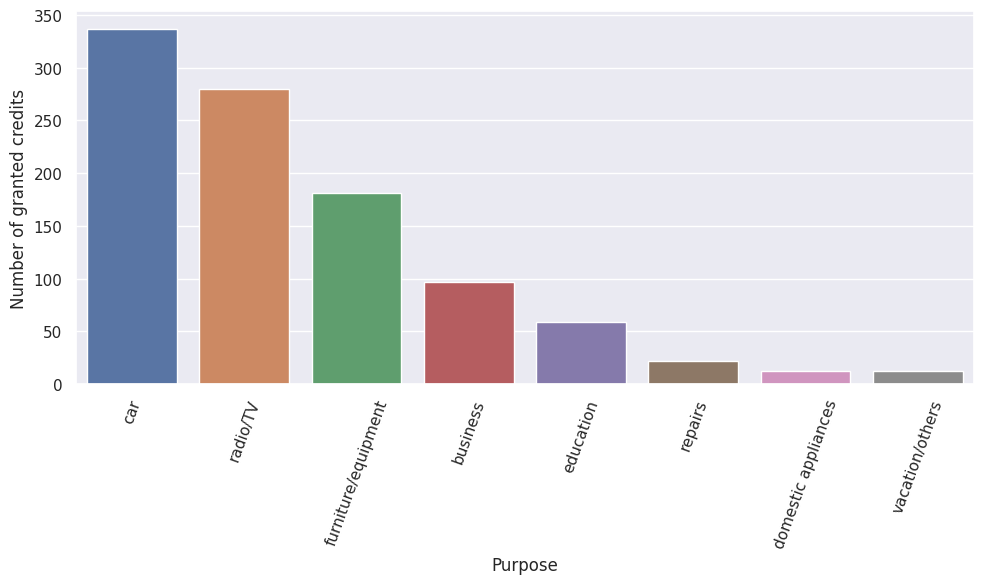

In [69]:
n_credits = data.groupby("Purpose")["Age"].count().rename("Count").reset_index()  # Shows the purpose of granted credits
n_credits.sort_values(by=["Count"], ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
bar = sns.barplot(x="Purpose", y="Count", data=n_credits)
bar.set_xticklabels(bar.get_xticklabels(), rotation=70)
plt.ylabel("Number of granted credits")
plt.tight_layout()

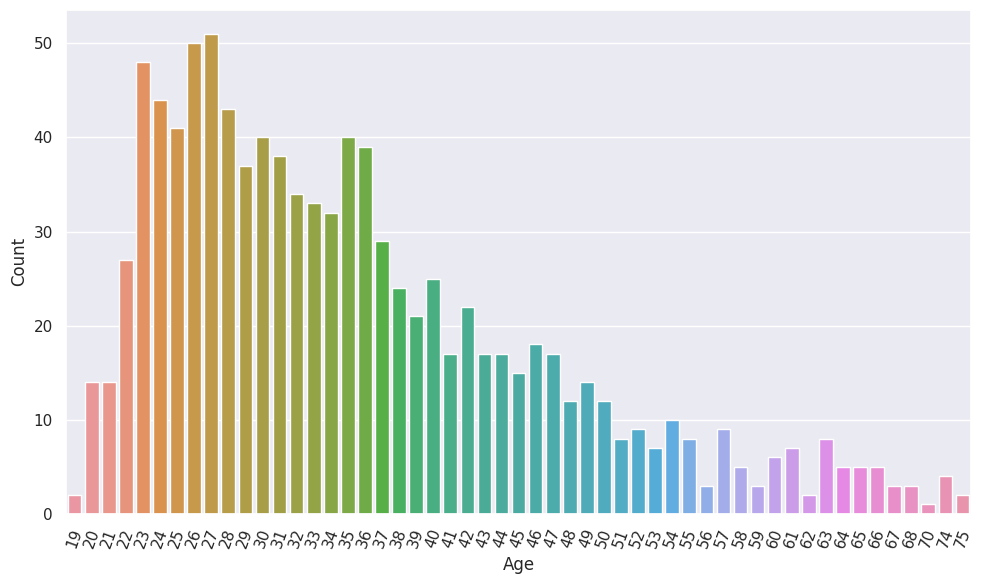

In [70]:
n_credits = data.groupby("Age")["Purpose"].count().rename("Count").reset_index()  # Shows the amount of granted credits
n_credits.sort_values(by=["Count"], ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
bar = sns.barplot(x="Age", y="Count", data=n_credits)
bar.set_xticklabels(bar.get_xticklabels(), rotation=70)
plt.tight_layout()

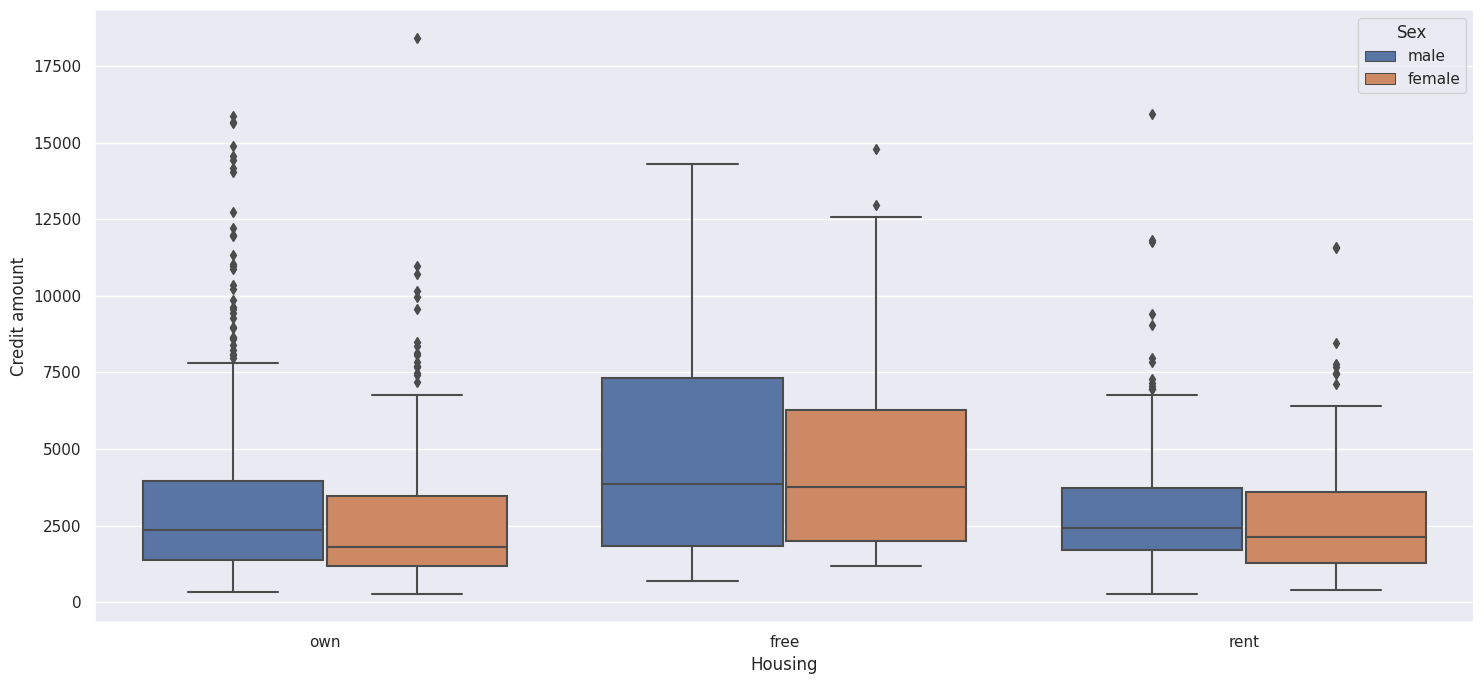

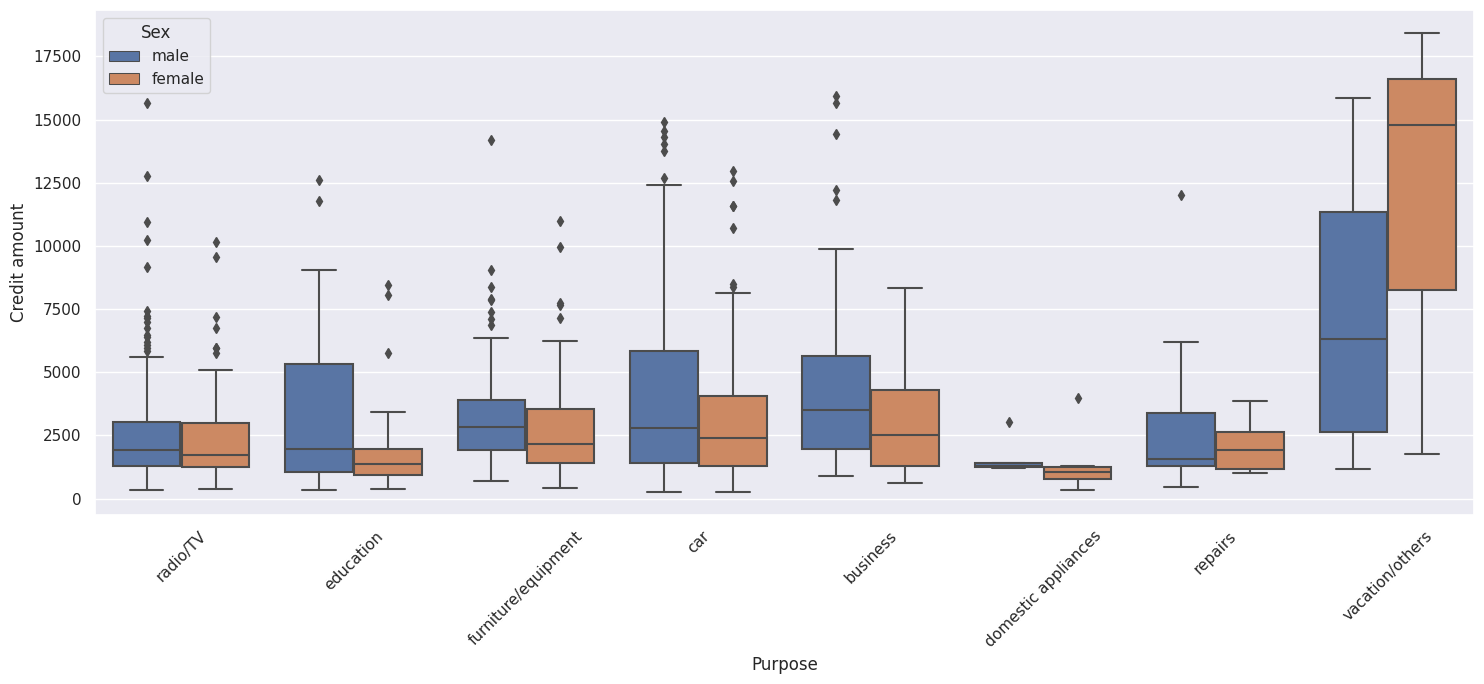

,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose,Risk
0,67,male,2,own,little,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,little,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [71]:
def boxes(x, y, h, r=45):
    fig, ax = plt.subplots(figsize=(15, 7))
    sns.boxplot(x=x, y=y, hue=h, data=data, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=r)
    plt.tight_layout()
    plt.show()


boxes("Housing", "Credit amount", "Sex", r=0)

boxes("Purpose", "Credit amount", "Sex")

data.rename(columns={'Saving accounts': 'Saving_accounts'}, inplace=True)
data.rename(columns={'Checking account': 'Checking_account'}, inplace=True)
data.rename(columns={'Credit amount': 'Credit_amount'}, inplace=True)

data.head(5)

In [72]:
def visualize_unique_values(data, variable):
    unique_values = data[variable].unique()
    print(f"{variable}: {', '.join(map(str, unique_values))}")

visualize_unique_values(data, 'Sex')
visualize_unique_values(data, 'Housing')
visualize_unique_values(data, 'Saving_accounts')
visualize_unique_values(data, 'Checking_account')
visualize_unique_values(data, 'Purpose')
#We need to transform these categorical variables into numbers.

Sex: male, female
Housing: own, free, rent
Saving_accounts: little, quite rich, rich, moderate
Checking_account: little, moderate, rich
Purpose: radio/TV, education, furniture/equipment, car, business, domestic appliances, repairs, vacation/others


### **6) Transformation of Categorical Variables**

In [73]:
from sklearn import preprocessing   # for LabelEncoder
le = preprocessing.LabelEncoder()   # Converts categorical columns to numeric values
 
data['Sex'] = le.fit_transform(data['Sex'])
data['Housing'] = le.fit_transform(data['Housing'])
data['Saving_accounts'] = le.fit_transform(data['Saving_accounts'])
data['Checking_account'] = le.fit_transform(data['Checking_account'])
data['Purpose'] = le.fit_transform(data['Purpose'])
data['Risk'] = le.fit_transform(data['Risk'])

data.head(5)  # We can see the numeric representation of our dataset


,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose,Risk
0,67,1,2,1,0,0,1169,6,5,1
1,22,0,2,1,0,1,5951,48,5,0
2,49,1,1,1,0,0,2096,12,3,1
3,45,1,2,0,0,0,7882,42,4,1
4,53,1,2,0,0,0,4870,24,1,0


### **7)Split TRAINING data as train (80%) and validation (20%)**

In [74]:
#Before applying models, we split our dataset into train and test sets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('Sex', axis=1), data['Sex'], test_size=0.2, random_state=42) # Rows; axis=0 Columns; axis=1

#20% of the dataset is allocated for testing, while 80% is used for training.

### **8) FIRST METHOD: Logistic Regression**

In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Data preprocessing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a list of values for the hyperparameter to be tuned
hyperparameter_values = [0.001, 0.01, 0.1, 1.0, 10.0]

best_lr_accuracy = 0.0
best_hyperparameter = None

# Iterate over different hyperparameter values
for value in hyperparameter_values:
    lr = LogisticRegression(C=value)
    lr.fit(X_train_scaled, y_train)

    accuracy = lr.score(X_test_scaled, y_test)

    if accuracy > best_lr_accuracy:
        best_lr_accuracy = accuracy
        best_hyperparameter = value

print("Best Logistic Regression Test Accuracy: {:.2f}%".format(best_lr_accuracy * 100))
print("Best Hyperparameter: {}".format(best_hyperparameter))

Best Logistic Regression Test Accuracy: 72.00%
Best Hyperparameter: 0.001


### **9) SECOND METHOD: Decision Trees**

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


parameter_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  # Example parameter values for max_depth

best_dt_accuracy = 0.0
best_parameters = None

# Iterate over different max_depth values
for max_depth_value in parameter_values:
    # Create and train the Decision Tree classifier
    dtc = DecisionTreeClassifier(max_depth=max_depth_value)
    dtc.fit(X_train, y_train)
    
    # Evaluate the classifier on the test set
    accuracy = dtc.score(X_test, y_test)
    
    # Check if the current accuracy is better than the previous best accuracy
    if accuracy > best_dt_accuracy:
        best_dt_accuracy = accuracy
        best_parameters = max_depth_value

    print("Accuracy for max_depth = {:.2f} is {:.2f}%".format(max_depth_value, accuracy*100))

# Print the best accuracy and the corresponding max_depth value
print()
print("Best Decision Tree Test Accuracy: {:.2f}%".format(best_dt_accuracy*100))
print("Best max_depth value:", best_parameters)

Accuracy for max_depth = 1.00 is 70.50%
Accuracy for max_depth = 2.00 is 73.50%
Accuracy for max_depth = 3.00 is 73.00%
Accuracy for max_depth = 4.00 is 75.00%
Accuracy for max_depth = 5.00 is 73.00%
Accuracy for max_depth = 6.00 is 72.50%
Accuracy for max_depth = 7.00 is 71.00%
Accuracy for max_depth = 8.00 is 66.50%
Accuracy for max_depth = 9.00 is 68.00%
Accuracy for max_depth = 10.00 is 66.00%

Best Decision Tree Test Accuracy: 75.00%
Best max_depth value: 4


### **10) THIRD METHOD: Multilayer Perceptrons**

In [82]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Data preprocessing - StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the hyperparameters to iterate over
hidden_layer_sizes = [(50,), (100,), (50, 50), (100, 100)]
activations = ['relu', 'tanh']
alphas = [0.0001, 0.001, 0.01]
max_iter = 1000

best_nn_accuracy = 0.0
best_params = {}

# Iterate over different hyperparameter combinations
for hidden_layer_size in hidden_layer_sizes:
    for activation in activations:
        for alpha in alphas:
            # Create MLPClassifier with current hyperparameters
            nn = MLPClassifier(hidden_layer_sizes=hidden_layer_size,
                               activation=activation,
                               alpha=alpha,
                               solver='adam',
                               max_iter=max_iter,
                               learning_rate='adaptive',
                               learning_rate_init=0.01)
            # Train the model
            nn.fit(X_train_scaled, y_train)
            # Evaluate accuracy on the test set
            accuracy = nn.score(X_test_scaled, y_test)
            # Check if current accuracy is better than the best accuracy

            params = {
                'hidden_layer_sizes': hidden_layer_size,
                'activation': activation,
                'alpha': alpha,
            }

            if accuracy > best_nn_accuracy:
                best_nn_accuracy = accuracy
                best_params = params
            
            print("Accuracy is {:.2f}% for parameters:".format(accuracy*100), params)


print()
print("Best MLP Classifier Accuracy Score: {:.2f}%".format(best_nn_accuracy * 100))
print("Best Hyperparameters:", best_params)


Accuracy is 66.50% for parameters: {'hidden_layer_sizes': (50,), 'activation': 'relu', 'alpha': 0.0001}
Accuracy is 68.00% for parameters: {'hidden_layer_sizes': (50,), 'activation': 'relu', 'alpha': 0.001}
Accuracy is 63.50% for parameters: {'hidden_layer_sizes': (50,), 'activation': 'relu', 'alpha': 0.01}
Accuracy is 63.50% for parameters: {'hidden_layer_sizes': (50,), 'activation': 'tanh', 'alpha': 0.0001}
Accuracy is 64.00% for parameters: {'hidden_layer_sizes': (50,), 'activation': 'tanh', 'alpha': 0.001}
Accuracy is 65.00% for parameters: {'hidden_layer_sizes': (50,), 'activation': 'tanh', 'alpha': 0.01}
Accuracy is 67.00% for parameters: {'hidden_layer_sizes': (100,), 'activation': 'relu', 'alpha': 0.0001}
Accuracy is 65.00% for parameters: {'hidden_layer_sizes': (100,), 'activation': 'relu', 'alpha': 0.001}
Accuracy is 66.00% for parameters: {'hidden_layer_sizes': (100,), 'activation': 'relu', 'alpha': 0.01}
Accuracy is 62.50% for parameters: {'hidden_layer_sizes': (100,), 'act

### **11) FOURTH METHOD: K-Nearest Neighbors**

In [85]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Data preprocessing - StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the hyperparameters to iterate over
n_neighbors = [3, 5, 7, 9]
weights = ['uniform', 'distance']

best_knn_accuracy = 0.0
best_params = {}

# Iterate over different hyperparameter combinations
for n in n_neighbors:
    for w in weights:
        # Create KNeighborsClassifier with current hyperparameters
        knn = KNeighborsClassifier(n_neighbors=n, weights=w)
        # Train the model
        knn.fit(X_train_scaled, y_train)
        # Evaluate accuracy on the test set
        accuracy = knn.score(X_test_scaled, y_test)

        params = {
            'n_neighbors': n,
            'weights': w,
        }

        # Check if current accuracy is better than the best accuracy
        if accuracy > best_knn_accuracy:
            best_knn_accuracy = accuracy
            best_params = params
        
        print("Accuracy is {:.2f}% for parameters:".format(accuracy*100), params)


print()
print("Best kNN Classifier Accuracy Score: {:.2f}%".format(best_knn_accuracy * 100))
print("Best Hyperparameters:", best_params)


Accuracy is 65.50% for parameters: {'n_neighbors': 3, 'weights': 'uniform'}
Accuracy is 65.50% for parameters: {'n_neighbors': 3, 'weights': 'distance'}
Accuracy is 70.50% for parameters: {'n_neighbors': 5, 'weights': 'uniform'}
Accuracy is 68.00% for parameters: {'n_neighbors': 5, 'weights': 'distance'}
Accuracy is 69.00% for parameters: {'n_neighbors': 7, 'weights': 'uniform'}
Accuracy is 68.00% for parameters: {'n_neighbors': 7, 'weights': 'distance'}
Accuracy is 69.00% for parameters: {'n_neighbors': 9, 'weights': 'uniform'}
Accuracy is 70.50% for parameters: {'n_neighbors': 9, 'weights': 'distance'}

Best kNN Classifier Accuracy Score: 70.50%
Best Hyperparameters: {'n_neighbors': 5, 'weights': 'uniform'}


### **12) FIFTH METHOD: Support Vector Machines**

In [86]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Data preprocessing - StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the hyperparameters to iterate over
C_values = [1.0, 10.0, 100.0]
kernel_values = ['linear', 'rbf', 'poly', 'sigmoid']
gamma_values = [0.1, 0.01]

best_svm_accuracy = 0.0
best_params = {}

# Iterate over different hyperparameter combinations
for C in C_values:
    for kernel in kernel_values:
        for gamma in gamma_values:
            # Create SVC with current hyperparameters
            svm = SVC(C=C, kernel=kernel, gamma=gamma)
            # Train the model
            svm.fit(X_train_scaled, y_train)
            # Evaluate accuracy on the test set
            accuracy = svm.score(X_test_scaled, y_test)
            # Check if current accuracy is better than the best accuracy

            params = {
                'C': C,
                'kernel': kernel,
                'gamma': gamma
            }

            if accuracy > best_svm_accuracy:
                best_svm_accuracy = accuracy
                best_params = params
            
            print("Accuracy is {:.2f}% for parameters:".format(accuracy*100), params)

print()
print("Best SVM Classifier Accuracy Score: {:.2f}%".format(best_svm_accuracy * 100))
print("Best Hyperparameters:", best_params)


Accuracy is 72.00% for parameters: {'C': 1.0, 'kernel': 'linear', 'gamma': 0.1}
Accuracy is 72.00% for parameters: {'C': 1.0, 'kernel': 'linear', 'gamma': 0.01}
Accuracy is 73.00% for parameters: {'C': 1.0, 'kernel': 'rbf', 'gamma': 0.1}
Accuracy is 72.00% for parameters: {'C': 1.0, 'kernel': 'rbf', 'gamma': 0.01}
Accuracy is 73.00% for parameters: {'C': 1.0, 'kernel': 'poly', 'gamma': 0.1}
Accuracy is 72.00% for parameters: {'C': 1.0, 'kernel': 'poly', 'gamma': 0.01}
Accuracy is 67.50% for parameters: {'C': 1.0, 'kernel': 'sigmoid', 'gamma': 0.1}
Accuracy is 72.00% for parameters: {'C': 1.0, 'kernel': 'sigmoid', 'gamma': 0.01}
Accuracy is 72.00% for parameters: {'C': 10.0, 'kernel': 'linear', 'gamma': 0.1}
Accuracy is 72.00% for parameters: {'C': 10.0, 'kernel': 'linear', 'gamma': 0.01}
Accuracy is 71.50% for parameters: {'C': 10.0, 'kernel': 'rbf', 'gamma': 0.1}
Accuracy is 71.00% for parameters: {'C': 10.0, 'kernel': 'rbf', 'gamma': 0.01}
Accuracy is 71.00% for parameters: {'C': 10.

### **13) Compilation and Visualization of Results**

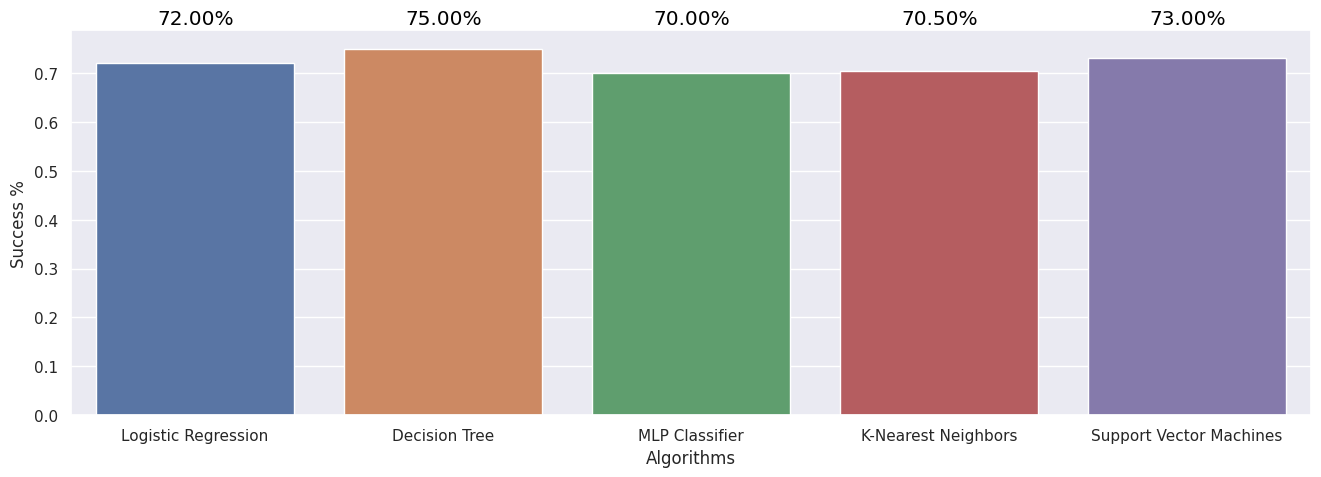

In [87]:
#Compilation part
methods_accuracy = {
    "Logistic Regression":best_lr_accuracy,
    "Decision Tree" : best_dt_accuracy,
    "MLP Classifier" : best_nn_accuracy,
    "K-Nearest Neighbors" : best_knn_accuracy,
    "Support Vector Machines" : best_svm_accuracy
}

methods = ["Logistic Regression", "Decision Tree", "MLP Classifier", "K-Nearest Neighbors", "Support Vector Machines"]
accuracy = [best_lr_accuracy, best_dt_accuracy, best_nn_accuracy, best_knn_accuracy, best_svm_accuracy]

#Visualization part
sns.set()
plt.figure(figsize=(16,5))
plt.ylabel("Success %")
plt.xlabel("Algorithms")
sns.barplot(x=methods, y=accuracy, palette="deep")

for line in range(len(methods)):
     plt.text(line-0.15,
              0.80,
             "{:.2f}%".format(accuracy[line]*100),
             horizontalalignment='left',
              size='large',
             color="black",
             )

        
plt.savefig('Total_Comparison.png',transparent=True)

        
plt.show()